In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error



In [2]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Action,Category_Adventure,Category_Arcade,...,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9659,4.3,142.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9660,5.0,9.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9661,0.0,0.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train-Test-Split

In [3]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [4]:
X.shape

(9663, 60)

In [5]:
y.shape

(9663,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [None, 10, 20, 30],
        'model__min_samples_split' :[2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5; tot

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [None, 10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10]}],
             verbose=2)

In [8]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5} with a score of 0.94


We run the model withouth the pca. We can see that the model max_depth reach the minimum range (how deep the tree is) 
the model__min_samples_leaf reach the top range(minumum number of sample at the base of the tree)
the model__min_sample_split reacht the top range(minimum number of samples required to split an internal node) 
We are going to rerun the model with different hyperparameters range and add pca. 


In [9]:
y_pred1 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred1))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)


Mean Absolute Error (MAE): 0.28130855201996624
Root Mean Square Error (RMSE): 0.4985046144047745
Coefficient of Determination (R-squared): 0.9439901468912331
Mean Squared Error (MSE): 0.2485068505828529
Root Mean Squared Logarithmic Error (RMSLE): 0.10867335869367369


In [10]:
grid_search.score(X_test, y_test)

0.9439901468912331

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [2, 4, 6],
        'model__min_samples_split' :[10, 15, 20],
        'model__min_samples_leaf': [4, 6, 8]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=10; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=10; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=10; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=10; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=10; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=15; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=15; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=15; total time=   0.1s
[CV] END model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=15; total time=   0.1s
[C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [2, 4, 6],
                          'model__min_samples_leaf': [4, 6, 8],
                          'model__min_samples_split': [10, 15, 20]}],
             verbose=2)

In [12]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 6, 'model__min_samples_leaf': 4, 'model__min_samples_split': 20} with a score of 0.40


For this model the max depth is only at 2 (the lowest range), the min samples leaf is at 6 (middle range) and the min samples split is at 10 (lowest range).


In [13]:
y_pred2 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
r2 = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred2))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Mean Absolute Error (MAE): 1.2794169298172944
Root Mean Square Error (RMSE): 1.6617868153621567
Coefficient of Determination (R-squared): 0.37758982156860255
Mean Squared Error (MSE): 2.7615354197114987
Root Mean Squared Logarithmic Error (RMSLE): 0.6600768271011457


In [14]:
grid_search.score(X_test, y_test)

0.37758982156860255

In [15]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [None, 1],
        'model__min_samples_split' :[2, 4, 8],
        'model__min_samples_leaf': [1, 2, 3, 4]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.1s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.1s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=4; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=4; total time=   1.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=4; total time=   1.1s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=4; tot

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [None, 1],
                          'model__min_samples_leaf': [1, 2, 3, 4],
                          'model__min_samples_split': [2, 4, 8]}],
             verbose=2)

In [16]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2} with a score of 0.79


For this model the max depth is only at 1, the min samples leaf is at 1(lower range) and the min samples split is at 8 (upper range).

In [17]:
y_pred3 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
r2 = r2_score(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred3))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Mean Absolute Error (MAE): 0.4950509235011248
Root Mean Square Error (RMSE): 0.9732664913740557
Coefficient of Determination (R-squared): 0.786504064774126
Mean Squared Error (MSE): 0.947247663231565
Root Mean Squared Logarithmic Error (RMSLE): 0.33981107096613883


In [18]:
grid_search.score(X_test, y_test)

0.786504064774126

In [19]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [None, 1],
        'model__min_samples_split' :[1, 2, 3, 4, 5, 6, 7],
        'model__min_samples_leaf': [1, 2, 3, 4]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=1; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=1; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=1; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=1; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=1; total time=   0.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.1s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; tot

c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [None, 1],
                          'model__min_samples_leaf': [1, 2, 3, 4],
                          'model__min_samples_split': [1, 2, 3, 4, 5, 6, 7]}],
             verbose=2)

In [20]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2} with a score of 0.79


In [21]:
y_pred4 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred4)
rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
r2 = r2_score(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred4))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Mean Absolute Error (MAE): 0.4977552074909753
Root Mean Square Error (RMSE): 0.9782933943715975
Coefficient of Determination (R-squared): 0.7842929644117002
Mean Squared Error (MSE): 0.9570579654711019
Root Mean Squared Logarithmic Error (RMSLE): 0.3420088284288971


In [22]:
grid_search.score(X_test, y_test)

0.7842929644117002

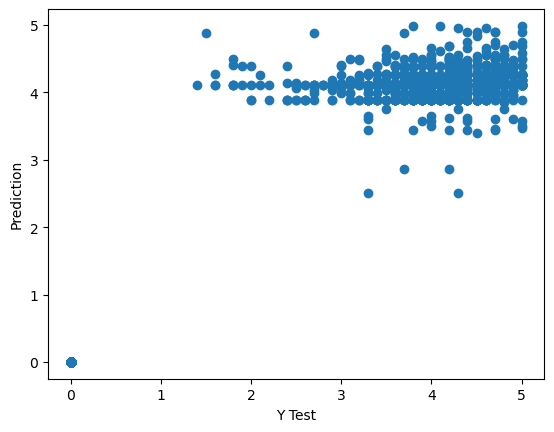

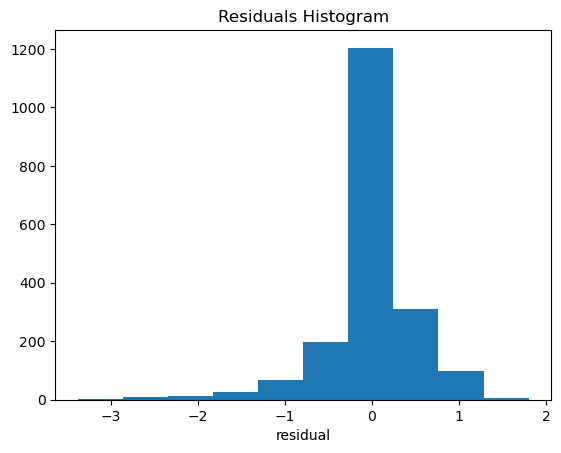

{'whiskers': [<matplotlib.lines.Line2D at 0x2692f3dafd0>,
 'caps': [<matplotlib.lines.Line2D at 0x26928fe6010>,
 'boxes': [<matplotlib.lines.Line2D at 0x2692e6a8d50>,
 'medians': [<matplotlib.lines.Line2D at 0x26928fe71d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26928fe5690>,
 'means': []}

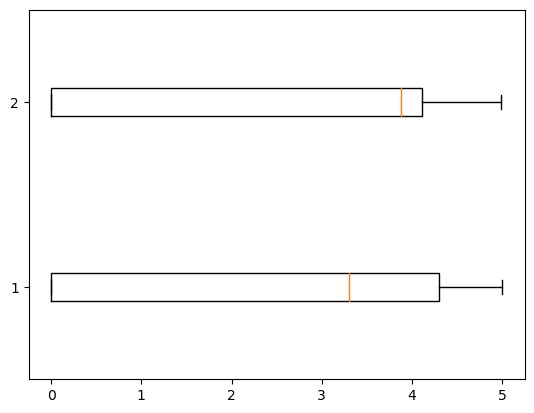

In [23]:
metrics.r2_score(y_test, y_pred1)

plt.scatter(y_test, y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred1])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred1], vert=False)


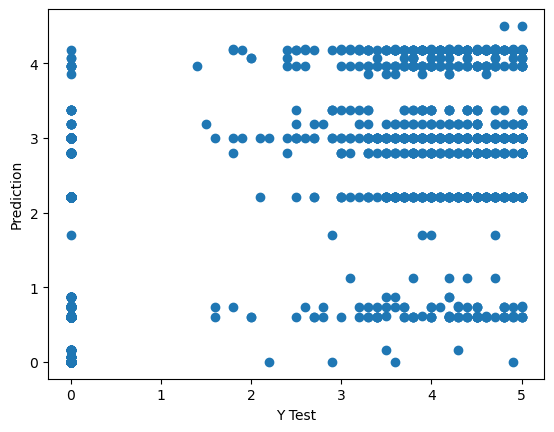

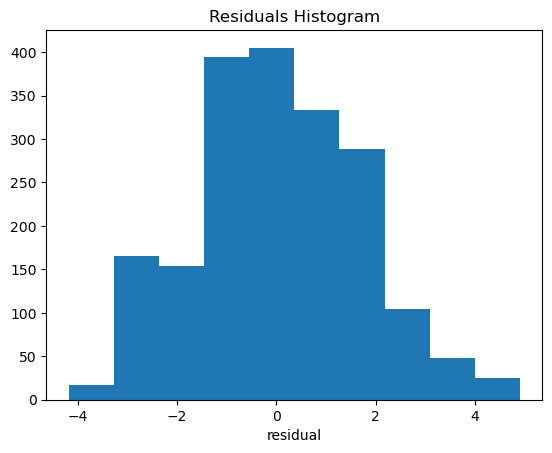

{'whiskers': [<matplotlib.lines.Line2D at 0x26928f3e090>,
 'caps': [<matplotlib.lines.Line2D at 0x26928f3f650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2692f0e6c10>,
 'medians': [<matplotlib.lines.Line2D at 0x2692f0641d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26928f63f90>,
 'means': []}

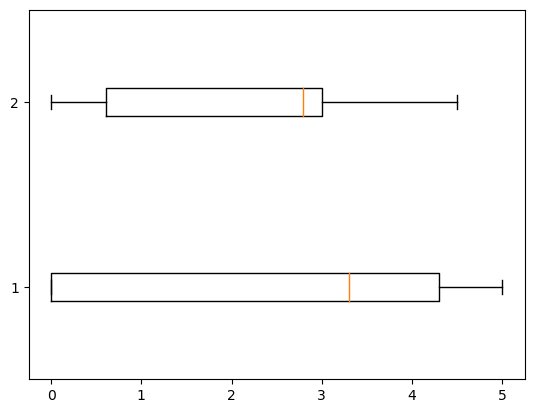

In [24]:
metrics.r2_score(y_test, y_pred2)

plt.scatter(y_test, y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred2])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred2], vert=False)


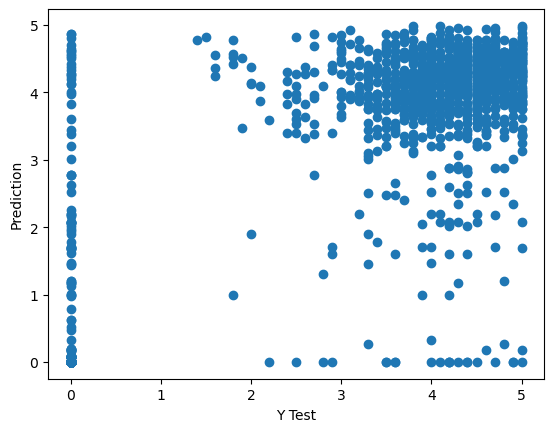

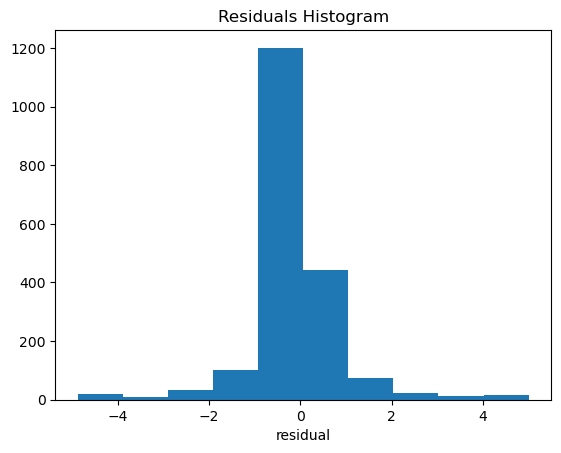

{'whiskers': [<matplotlib.lines.Line2D at 0x2692f815d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2692f817110>,
 'boxes': [<matplotlib.lines.Line2D at 0x2692f815510>,
 'medians': [<matplotlib.lines.Line2D at 0x2692f817fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2692f828710>,
 'means': []}

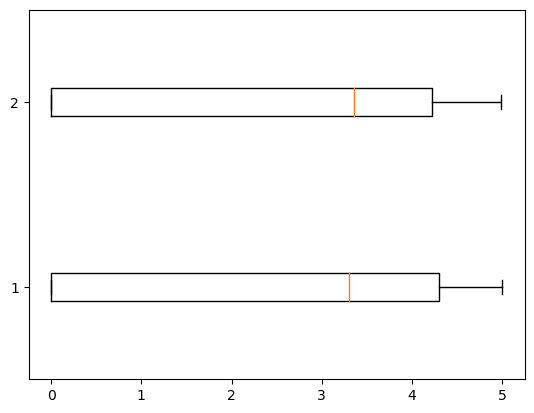

In [25]:
metrics.r2_score(y_test, y_pred3)

plt.scatter(y_test, y_pred3)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred3])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred3], vert=False)


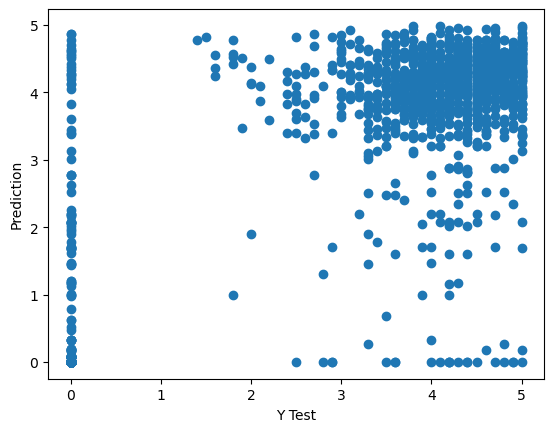

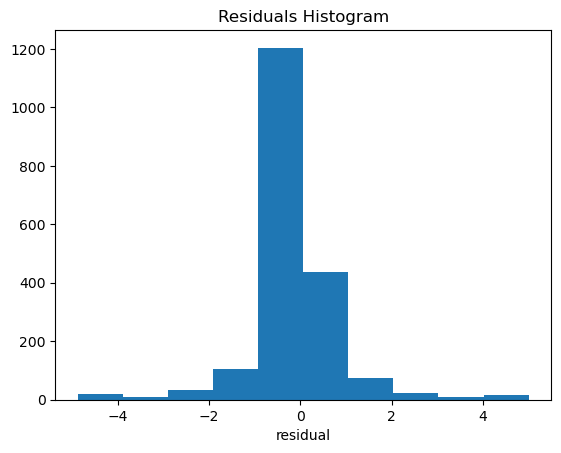

{'whiskers': [<matplotlib.lines.Line2D at 0x26930041e90>,
 'caps': [<matplotlib.lines.Line2D at 0x26930043590>,
 'boxes': [<matplotlib.lines.Line2D at 0x26930041510>,
 'medians': [<matplotlib.lines.Line2D at 0x2693004cc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x26930035ad0>,
 'means': []}

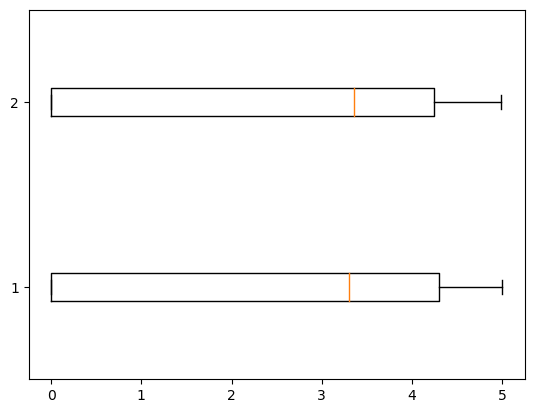

In [26]:
metrics.r2_score(y_test, y_pred4)

plt.scatter(y_test, y_pred4)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred4])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()

plt.boxplot([y_test, y_pred4], vert=False)
